# KNN with sklearn - Lab

## Introduction

In this lab, we'll learn how to use sklearn's implementation of a KNN classifier  on some real world datasets!

## Objectives

You will be able to:

* Use KNN to make classification predictions on a real-world dataset
* Perform a parameter search for 'k' to optimize model performance
* Evaluate model performance and interpret results

## Getting Started

In this lab, we'll make use of sklearn's implementation of the **_K-Nearest Neighbors_** algorithm. We'll use it to make predictions on the Titanic dataset. 

We'll start by importing the dataset, and then deal with preprocessing steps such as removing unnecessary columns and normalizing our dataset.

You'll find the titanic dataset stored in the `titanic.csv` file. In the cell below:

* Import pandas and set the standard alias.
* Read in the data from `titanic.csv` and store it in a pandas DataFrame. 
* Print the head of the DataFrame to ensure everything loaded correctly.

In [11]:
import numpy as np
import pandas as pd
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great! Now, we'll preprocess our data to get it ready for use with a KNN classifier.

## Preprocessing Our Data

This stage should be pretty familiar to you by now. Although it's not the fun part of machine learning, it's good practice to get used to it.  Although it isn't as fun or exciting as training machine learning algorithms, it's a very large, very important part of the Data Science Process. As a Data Scientist, you'll often spend the majority of your time wrangling and preprocessing, just to get it ready for use with supervised learning algorithms. 

Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. 

In the cells below, complete the following steps:

1. Remove unnecessary columns (PassengerId, Name, Ticket, and Cabin).
2. Convert `Sex` to a binary encoding, where female is `0` and male is `1`.
3. Detect and deal with any null values in the dataset. 
    * For `Age`, replace null values with the median age for the dataset. 
    * For `Embarked`, drop the rows that contain null values
4. One-Hot Encode categorical columns such as `Embarked`.
5. Store our target column, `Survived`, in a separate variable and remove it from the DataFrame. 

In [12]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [13]:
sex_dummies=pd.get_dummies(data['Sex'],prefix='Sex_',drop_first=True)

In [14]:
data=pd.concat([data,sex_dummies],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex__male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [16]:
data.drop('Sex',axis=1,inplace=True)

In [23]:
data.isna().sum()

Survived       0
Pclass         0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
Sex__male      0
dtype: int64

In [25]:
data.replace(np.nan,data.median(),inplace=True)

In [26]:
data.dropna(subset=['Embarked'],inplace=True)

In [27]:
data.isna().sum()

Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Sex__male    0
dtype: int64

In [29]:
embarked_dummies=pd.get_dummies(data['Embarked'],prefix='Emarked_')
data.drop('Embarked',axis=1,inplace=True)

In [28]:
target=data['Survived']

In [32]:
data=pd.concat([data,embarked_dummies],axis=1)

In [33]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Emarked__C,Emarked__Q,Emarked__S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


## Normalizing Our Data

Good job preprocessing our data! This can seem tedious, but its a very important foundational skill in any Data Science toolbox. The final step we we'll take in our preprocessing efforts is to **_Normalize_** our data. Recall that normalization (also sometimes called **_Standardization_** or **_Scaling_**) means making sure that all of our data is represented at the same scale.  The most common way to do this is to convert all numerical values to z-scores. 

Since KNN is a distance-based classifier, data on different scales and negatively affect the results of our model! Predictors on much larger scales will overwhelm data with much smaller scales, because euclidean distance is going to treat them as the same.

To scale our data, we'll make use of the `StandardScaler` object found inside the `sklearn.preprocessing` module. 

In the cell below:

* Import and instantiate a `StandardScaler` object. 
* Use the scaler's `.fit_transform()` method to create a scaled version of our dataset. 
* The result returned by the `fit_transform` call will be a numpy array, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns`.
* Print out the head of `scaled_df` to ensure everything worked correctly.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Emarked__C,Emarked__Q,Emarked__S
0,-0.786961,0.825209,-0.563674,0.431350,-0.474326,-0.500240,0.735342,-0.482711,-0.307941,0.616794
1,1.270711,-1.572211,0.669217,0.431350,-0.474326,0.788947,-1.359911,2.071634,-0.307941,-1.621287
2,1.270711,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,-1.359911,-0.482711,-0.307941,0.616794
3,1.270711,-1.572211,0.438050,0.431350,-0.474326,0.422861,-1.359911,-0.482711,-0.307941,0.616794
4,-0.786961,0.825209,0.438050,-0.475199,-0.474326,-0.484133,0.735342,-0.482711,-0.307941,0.616794


You may have noticed that the scaler also scaled our binary/one-hot encoded columns, too! Although it doesn't look as pretty, this has no negative effect on our model. Each 1 and 0 have been replaced with corresponding decimal values, but each binary column still only contains 2 values, meaning the overall information content of each column has not changed. 

#### Creating Training and Testing Sets

Now that we've preprocessed our data, the only step remaining is to split our data into training and testing sets. 

In the cell below:

* Import `train_test_split` from the `sklearn.model_selection` module
* Use `train_test_split` to split our data into training and testing sets, with a `test_size` of `0.25`.

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,1:], target, test_size=0.20, random_state=42)

## Creating and Fitting our KNN Model

Now that we've preprocessed our data successfully, it's time for the fun stuff--let's create a KNN classifier and use it to make predictions on our dataset!  Since you've got some experience on this part from when we built our own model, we won't hold your hand through section. 

In the cells below:

* Import `KNeighborsClassifier` from the `sklearn.neighbors` module.
* Instantiate a classifier. For now, we'll just use the default parameters. 
* Fit the classifier to our training data/labels
* Use the classifier to generate predictions on our testing data. Store these predictions inside the variable `test_preds`.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

In [50]:
y_train.head()

708    1
240    0
382    0
792    0
683    0
Name: Survived, dtype: int64

In [44]:
knn.fit(X_train,y_train)
test_preds=knn.predict(X_test)

Now, in the cells below, import all the necessary evaluation metrics from `sklearn.metrics` abd then complete the following `print_metrics()` function so that it prints out **_Precision, Recall, Accuracy,_** and **_F1-Score_** when given a set of `labels` and `preds`. 

Then, use it to print out the evaluation metrics for our test predictions stored in `test_preds`, and the corresponding labels in `y_test`.

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [46]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,preds)))
    print("Recall Score: {}".format(recall_score(labels,preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels,preds)))
    print("F1 Score: {}".format(f1_score(labels,preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7222222222222222
Recall Score: 0.7536231884057971
Accuracy Score: 0.7921348314606742
F1 Score: 0.7375886524822696


**_QUESTION:_** Interpret each of the metrics above, and explain what they tell us about our model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.

Write your answer below this line:
________________________________________________________________________________

* Precision: 72% of our predicted positive values are actually positive. 
* Recall: 75% of the total positive values are found.
* Accuracy: 79% of our predicted values were correct.
* F1 Score: Both Precision and Recall were high for our model.


## Improving Model Performance

Our overall model results are better than random chance, but not by a large margin. For the remainder of this notebook, we'll focus on improving model performance. This is also a big part of the Data Science Process--your first fit is almost never your best. Modeling is an **_iterative process_**, meaning that we should make small incremental changes to our model and use our intuition to see if we can improve the overall performance. 

First, we'll start off by trying to find the optimal number of neighbors to use for our classifier. To do this, we'll write a quick function that iterates over multiple values of k and finds the one that returns the best overall performance. 

In the cell below, complete the `find_best_k()` function.  This function should:

* take in six parameters:
    * `X_train`, `y_train`, `X_test`, and  `y_test`
    * `min_k` and `max_k`. Set these to `1` and `25`, by default
* Create two variables, `best_k` and `best_score`
* Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
* For each iteration:
    * Create a new KNN classifier, and set the `n_neighbors` parameter to the current value for k, as determined by our loop.
    * Fit this classifier to the training data.
    * Generate predictions for `X_test` using the fitted classifier.
    * Calculate the **_F1-score_** for these predictions.
    * Compare this F1-score to `best_score`. If better, update `best_score` and `best_k`.
* Once it has checked every value for `k`, print out the best value for k and the F1-score it achieved.

In [51]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k=0
    best_score=0
    for k in range(min_k,max_k+1,2):
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        preds=knn.predict(X_test)
        score=f1_score(y_test,preds)
        if score>best_score:
            best_score=score
            best_k=k
    return best_k,best_score

In [52]:
find_best_k(X_train, y_train, X_test, y_test)
# Expected Output:

# Best Value for k: 3
# F1-Score: 0.6444444444444444

(17, 0.7517730496453902)

We improved our model performance by over 4 percent just by finding an optimal value for k. Good job! There are other parameters in the model that you can also tune. In a later section, we'll cover how we can automate the parameter search process using a technique called **_Grid Search_**. For, try playing around with the different options for parameters, and seeing how it affects model performance. For a full list of model parameters, see the [sklearn documentation !](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## (Optional) Level Up: Iterating on the Data

As an optional (but recommended!) exercise, think about the decisions we made during the preprocessing steps that could have affected our overall model performance. For instance, we replaced missing age values with the column median. Could this have affected ourn overall performance? How might the model have fared if we had just dropped those rows, instead of using the column median? What if we reduced dimensionality by ignoring some less important columns altogether?

In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. Perhaps you should consider dropping certain columns, or dealing with null values differently, or even using a different sort of scaling (or none at all!). Try a few different iterations on the preprocessing and see how it affects the overall performance of the model. The `find_best_k` function handles all of the fitting--use this to iterate quickly as you try different strategies for dealing with data preprocessing! 


In [53]:
no_siblings=scaled_df.drop(['Survived','SibSp'],axis=1,inplace=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Emarked__C,Emarked__Q,Emarked__S
0,-0.786961,0.825209,-0.563674,0.431350,-0.474326,-0.500240,0.735342,-0.482711,-0.307941,0.616794
1,1.270711,-1.572211,0.669217,0.431350,-0.474326,0.788947,-1.359911,2.071634,-0.307941,-1.621287
2,1.270711,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,-1.359911,-0.482711,-0.307941,0.616794
3,1.270711,-1.572211,0.438050,0.431350,-0.474326,0.422861,-1.359911,-0.482711,-0.307941,0.616794
4,-0.786961,0.825209,0.438050,-0.475199,-0.474326,-0.484133,0.735342,-0.482711,-0.307941,0.616794


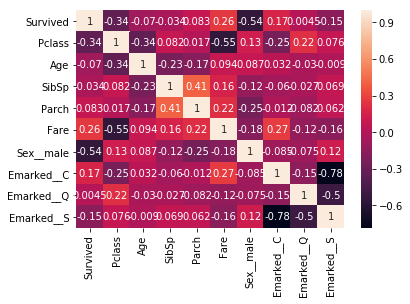

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(scaled_df.corr(),annot=True)
plt.show()

## Summary

Good job! This concludes today's section!